In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
data = pd.read_csv('CGI data.csv')
data.tail()

,date,open,high,low,close,volume
5298,10/28/2019,78.40,78.430,77.91,78.29,127870
5299,10/29/2019,78.25,78.605,77.34,77.38,177438
5300,10/30/2019,77.60,78.150,77.30,78.11,225121
5301,10/31/2019,78.00,78.240,77.59,77.72,177231
5302,11/1/2019,78.00,78.510,77.77,78.31,141106


In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
parse_data = pd.read_csv('CGI data.csv', parse_dates=['date'], 
                         index_col='date',date_parser=dateparse)
parse_data.head()

,open,high,low,close,volume
date,,,,,
1998-10-07,6.125,6.250,6.125,6.220,39200
1998-10-08,6.155,6.155,5.970,6.000,19400
1998-10-09,5.970,5.970,5.250,5.560,88800
1998-10-12,5.625,5.750,5.625,5.625,8800
1998-10-13,5.690,5.690,5.405,5.405,18600


In [7]:
parse_data = parse_data[['open']]
parse_data.head()

,open
date,
1998-10-07,6.125
1998-10-08,6.155
1998-10-09,5.970
1998-10-12,5.625
1998-10-13,5.690


In [10]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

C:\Users\DELL\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.open   No. Observations:                 5302
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3037.598
Method:                       css-mle   S.D. of innovations              0.429
Date:                Tue, 10 Dec 2019   AIC                           6089.196
Time:                        10:50:17   BIC                           6135.227
Sample:                             1   HQIC                          6105.281
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0136      0.005      2.516      0.012       0.003       0.024
ar.L1.D.open    -0.0343      0.014     -2.495      0.013      -0.061      -0.007
ar.L2.D.open    -0.0074      0.014     -0.54

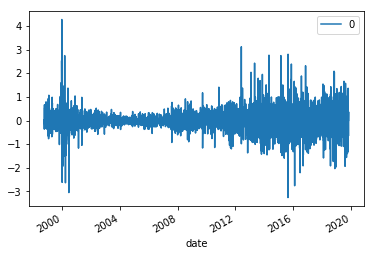

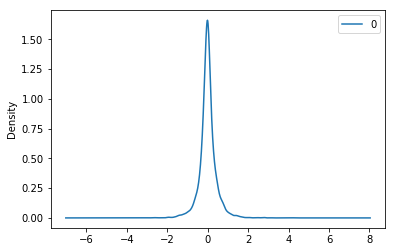

                 0
count  5302.000000
mean     -0.000005
std       0.429158
min      -3.257501
25%      -0.170189
50%      -0.008699
75%       0.162263
max       4.270769


In [12]:
model = ARIMA(parse_data, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=25.893280, expected=25.970000
predicted=25.971238, expected=26.190000
predicted=26.191218, expected=26.240000
predicted=26.225917, expected=26.800000
predicted=26.788688, expected=27.000000
predicted=26.964932, expected=26.800000
predicted=26.783789, expected=27.180000
predicted=27.168294, expected=27.320000
predicted=27.298577, expected=27.340000
predicted=27.338005, expected=27.370000
predicted=27.359773, expected=26.570000
predicted=26.576663, expected=26.660000
predicted=26.706497, expected=27.380000
predicted=27.388247, expected=27.200000
predicted=27.197281, expected=27.580000
predicted=27.578234, expected=27.130000
predicted=27.097337, expected=27.420000
predicted=27.444203, expected=27.360000
predicted=27.347427, expected=26.950000
predicted=26.975496, expected=26.870000
predicted=26.891437, expected=26.920000
predicted=26.939906, expected=26.820000
predicted=26.842600, expected=26.930000
predicted=26.944104, expected=26.980000
predicted=26.980448, expected=27.240000


predicted=30.153185, expected=30.280000
predicted=30.247864, expected=29.350000
predicted=29.323772, expected=29.510000
predicted=29.550625, expected=29.450000
predicted=29.459983, expected=29.210000
predicted=29.253978, expected=29.300000
predicted=29.307538, expected=29.270000
predicted=29.278250, expected=28.840000
predicted=28.857618, expected=29.580000
predicted=29.601665, expected=29.900000
predicted=29.871543, expected=29.690000
predicted=29.688003, expected=29.750000
predicted=29.734541, expected=29.460000
predicted=29.460710, expected=29.490000
predicted=29.522187, expected=29.730000
predicted=29.733518, expected=29.400000
predicted=29.406443, expected=29.140000
predicted=29.160442, expected=28.970000
predicted=28.986715, expected=30.210000
predicted=30.236909, expected=30.040000
predicted=29.988022, expected=30.320000
predicted=30.324193, expected=31.190000
predicted=31.131578, expected=32.910000
predicted=32.878859, expected=34.450000
predicted=34.363137, expected=34.150000


predicted=33.233176, expected=33.210000
predicted=33.225138, expected=33.720000
predicted=33.724952, expected=34.140000
predicted=34.119960, expected=34.600000
predicted=34.605573, expected=34.500000
predicted=34.482095, expected=37.250000
predicted=37.250883, expected=35.910000
predicted=35.849017, expected=35.860000
predicted=35.952481, expected=35.520000
predicted=35.442693, expected=34.750000
predicted=34.862180, expected=34.480000
predicted=34.491182, expected=34.590000
predicted=34.604106, expected=34.190000
predicted=34.214834, expected=34.420000
predicted=34.435065, expected=34.780000
predicted=34.764961, expected=34.940000
predicted=34.952446, expected=33.750000
predicted=33.760642, expected=33.870000
predicted=33.903422, expected=33.610000
predicted=33.602735, expected=33.610000
predicted=33.663480, expected=33.550000
predicted=33.537296, expected=34.270000
predicted=34.278438, expected=33.900000
predicted=33.889616, expected=34.400000
predicted=34.420129, expected=34.410000


predicted=41.845971, expected=42.050000
predicted=42.059961, expected=41.600000
predicted=41.591051, expected=41.680000
predicted=41.716018, expected=41.320000
predicted=41.316620, expected=41.420000
predicted=41.452591, expected=41.690000
predicted=41.682980, expected=44.440000
predicted=44.426743, expected=43.750000
predicted=43.713207, expected=42.970000
predicted=43.023997, expected=43.320000
predicted=43.246107, expected=41.870000
predicted=41.925948, expected=43.210000
predicted=43.254013, expected=42.020000
predicted=41.992093, expected=42.590000
predicted=42.678712, expected=42.340000
predicted=42.267913, expected=41.910000
predicted=42.002783, expected=42.230000
predicted=42.197315, expected=41.870000
predicted=41.897255, expected=42.380000
predicted=42.399055, expected=42.410000
predicted=42.388113, expected=42.350000
predicted=42.383932, expected=43.040000
predicted=43.007445, expected=43.310000
predicted=43.308237, expected=43.680000
predicted=43.685827, expected=44.040000


predicted=42.194234, expected=42.530000
predicted=42.508801, expected=41.710000
predicted=41.760161, expected=41.870000
predicted=41.941121, expected=41.230000
predicted=41.256094, expected=41.880000
predicted=41.899410, expected=40.860000
predicted=40.906168, expected=41.420000
predicted=41.440130, expected=41.760000
predicted=41.728909, expected=41.140000
predicted=41.205061, expected=40.550000
predicted=40.583901, expected=40.000000
predicted=40.018052, expected=40.030000
predicted=40.062973, expected=39.990000
predicted=40.028639, expected=40.520000
predicted=40.535701, expected=40.260000
predicted=40.278411, expected=40.510000
predicted=40.513348, expected=40.910000
predicted=40.878513, expected=40.400000
predicted=40.429694, expected=39.120000
predicted=39.182221, expected=38.970000
predicted=38.981652, expected=38.200000
predicted=38.253057, expected=37.890000
predicted=37.975194, expected=37.770000
predicted=37.806584, expected=37.880000
predicted=37.915682, expected=37.790000


predicted=47.929611, expected=48.160000
predicted=48.178116, expected=47.900000
predicted=47.911887, expected=47.280000
predicted=47.292526, expected=47.050000
predicted=47.060355, expected=47.780000
predicted=47.793175, expected=47.990000
predicted=48.013184, expected=48.260000
predicted=48.269780, expected=48.040000
predicted=48.021937, expected=47.670000
predicted=47.679418, expected=46.720000
predicted=46.736624, expected=46.330000
predicted=46.363210, expected=46.790000
predicted=46.814950, expected=46.910000
predicted=46.951386, expected=47.110000
predicted=47.128606, expected=47.280000
predicted=47.266990, expected=47.220000
predicted=47.223484, expected=46.950000
predicted=46.955299, expected=46.830000
predicted=46.837435, expected=47.560000
predicted=47.564720, expected=47.330000
predicted=47.346374, expected=47.330000
predicted=47.343663, expected=46.500000
predicted=46.493530, expected=46.870000
predicted=46.891729, expected=47.540000
predicted=47.540537, expected=47.410000


predicted=52.569555, expected=53.000000
predicted=53.004654, expected=53.050000
predicted=53.044981, expected=53.450000
predicted=53.444565, expected=52.950000
predicted=52.949133, expected=52.810000
predicted=52.827497, expected=52.860000
predicted=52.853657, expected=51.900000
predicted=51.955098, expected=51.150000
predicted=51.200297, expected=51.570000
predicted=51.577869, expected=51.310000
predicted=51.361811, expected=50.960000
predicted=51.020048, expected=50.350000
predicted=50.364580, expected=49.780000
predicted=49.821404, expected=49.040000
predicted=49.089143, expected=49.740000
predicted=49.769181, expected=49.620000
predicted=49.648877, expected=49.670000
predicted=49.714959, expected=50.230000
predicted=50.198082, expected=50.220000
predicted=50.225407, expected=49.690000
predicted=49.712616, expected=49.950000
predicted=49.936457, expected=49.700000
predicted=49.709418, expected=49.940000
predicted=49.970846, expected=49.960000
predicted=49.956843, expected=49.980000


C:\Users\DELL\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=57.260382, expected=58.050000
predicted=58.006263, expected=58.680000
predicted=58.636396, expected=58.340000
predicted=58.285289, expected=58.690000
predicted=58.669904, expected=58.310000
predicted=58.295858, expected=58.010000
predicted=58.048928, expected=58.220000
predicted=58.219246, expected=58.450000
predicted=58.466256, expected=58.790000
predicted=58.802460, expected=58.220000
predicted=58.229316, expected=56.990000
predicted=57.030490, expected=57.430000
predicted=57.444377, expected=58.650000
predicted=58.647667, expected=58.220000
predicted=58.260811, expected=59.100000
predicted=59.087227, expected=59.130000
predicted=59.070249, expected=59.540000
predicted=59.558645, expected=59.500000
predicted=59.469075, expected=58.790000
predicted=58.816700, expected=58.640000
predicted=58.654327, expected=58.660000
predicted=58.675211, expected=58.050000
predicted=58.103210, expected=58.130000
predicted=58.160651, expected=58.480000
predicted=58.480687, expected=57.920000


predicted=63.705428, expected=62.480000
predicted=62.522000, expected=63.430000
predicted=63.505250, expected=63.520000
predicted=63.451564, expected=64.210000
predicted=64.249453, expected=63.340000
predicted=63.326939, expected=62.500000
predicted=62.559364, expected=62.090000
predicted=62.110856, expected=62.200000
predicted=62.258196, expected=60.630000
predicted=60.726500, expected=59.390000
predicted=59.490495, expected=57.510000
predicted=57.595254, expected=58.500000
predicted=58.580665, expected=59.360000
predicted=59.371442, expected=59.990000
predicted=60.029034, expected=60.230000
predicted=60.172175, expected=60.410000
predicted=60.376530, expected=60.580000
predicted=60.559154, expected=60.230000
predicted=60.239467, expected=60.550000
predicted=60.552241, expected=61.750000
predicted=61.715034, expected=63.070000
predicted=63.032886, expected=63.770000
predicted=63.717960, expected=65.020000
predicted=64.938843, expected=64.110000
predicted=64.070514, expected=64.350000


predicted=77.596877, expected=76.480000
predicted=76.560268, expected=76.310000
predicted=76.315160, expected=76.680000
predicted=76.763396, expected=76.610000
predicted=76.663542, expected=77.400000
predicted=77.391841, expected=77.370000
predicted=77.361845, expected=78.650000
predicted=78.621901, expected=78.020000
predicted=78.008666, expected=78.240000
predicted=78.241103, expected=78.420000
predicted=78.381236, expected=78.030000
predicted=78.082552, expected=78.460000
predicted=78.451837, expected=77.700000
predicted=77.732213, expected=79.100000
predicted=79.088573, expected=77.760000
predicted=77.800255, expected=78.000000
predicted=78.031012, expected=78.070000
predicted=78.036972, expected=78.400000
predicted=78.460159, expected=78.250000
predicted=78.252830, expected=77.600000
predicted=77.631393, expected=78.000000
predicted=77.994612, expected=78.000000
Test MSE: 0.356


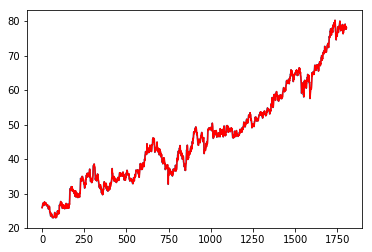

In [14]:
from sklearn.metrics import mean_squared_error
X = parse_data.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()